In [1]:
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/motos_todas.csv")
df.head()

Note: you may need to restart the kernel to use updated packages.


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
0,SXR,AM,49,3.2,120/70-12,120/70-12,D220,D220,775,n.d.,2599,APRILIA
1,RX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
2,SX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
3,RS 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,820,144,5499,APRILIA
4,Tuono 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,799,144,5399,APRILIA


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MODELO           229 non-null    object
 1   CON_CARNET       229 non-null    object
 2   CILINDRADA       229 non-null    object
 3   POTENCIA         229 non-null    object
 4   RUEDA_DELANTERA  229 non-null    object
 5   RUEDA_TRASERA    229 non-null    object
 6   FRENO_DELANTERO  229 non-null    object
 7   FRENO_TRASERO    229 non-null    object
 8   ALTURA_ASIENTO   229 non-null    object
 9   PESO_VACIO       229 non-null    object
 10  PRECIO           224 non-null    object
 11  MARCA            229 non-null    object
dtypes: object(12)
memory usage: 21.6+ KB


In [3]:
df.isnull().sum()

MODELO             0
CON_CARNET         0
CILINDRADA         0
POTENCIA           0
RUEDA_DELANTERA    0
RUEDA_TRASERA      0
FRENO_DELANTERO    0
FRENO_TRASERO      0
ALTURA_ASIENTO     0
PESO_VACIO         0
PRECIO             5
MARCA              0
dtype: int64

In [5]:
print(df.columns.tolist())
print(df.dtypes)

['MODELO', 'CON_CARNET', 'CILINDRADA', 'POTENCIA', 'RUEDA_DELANTERA', 'RUEDA_TRASERA', 'FRENO_DELANTERO', 'FRENO_TRASERO', 'ALTURA_ASIENTO', 'PESO_VACIO', 'PRECIO', 'MARCA']
MODELO             object
CON_CARNET         object
CILINDRADA         object
POTENCIA           object
RUEDA_DELANTERA    object
RUEDA_TRASERA      object
FRENO_DELANTERO    object
FRENO_TRASERO      object
ALTURA_ASIENTO     object
PESO_VACIO         object
PRECIO             object
MARCA              object
dtype: object


In [6]:
columnas_numericas = ['CILINDRADA', 'POTENCIA', 'ALTURA_ASIENTO', 'PESO_VACIO', 'PRECIO']

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
print(df.dtypes)

MODELO              object
CON_CARNET          object
CILINDRADA         float64
POTENCIA           float64
RUEDA_DELANTERA     object
RUEDA_TRASERA       object
FRENO_DELANTERO     object
FRENO_TRASERO       object
ALTURA_ASIENTO     float64
PESO_VACIO         float64
PRECIO             float64
MARCA               object
dtype: object


In [8]:
print(df.isnull().sum())


MODELO              0
CON_CARNET          0
CILINDRADA          5
POTENCIA            3
RUEDA_DELANTERA     0
RUEDA_TRASERA       0
FRENO_DELANTERO     0
FRENO_TRASERO       0
ALTURA_ASIENTO     13
PESO_VACIO          4
PRECIO              8
MARCA               0
dtype: int64


Claramente acá tenemos un problema, con 13 valores NaN en altura de asiento.

In [9]:
df[df.isnull().any(axis=1)]



,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
0,SXR,AM,49.0,3.2,120/70-12,120/70-12,D220,D220,775.0,NaN,2599.0,APRILIA
24,CE 02,A1-AM,NaN,14.0,120/80-14,150/70-14,D239,D220,750.0,132.0,8425.0,BMW
25,CE 04,A2-A1,NaN,42.0,120/70 R15,160/60 R15,2D265,D265,780.0,231.0,12075.0,BMW
27,F 800 GS,A-A2,895.0,87.0,110/80 R19,150/70 R17,2D305,D265,NaN,227.0,11275.0,BMW
30,F 900 GS,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,NaN,219.0,13980.0,BMW
31,F 900 GS Adventure,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,NaN,NaN,15430.0,BMW
59,R 18 Octane,A,1802.0,NaN,120/70 R19,180/65 B16,2D300,D300,730.0,NaN,28930.0,BMW
61,Monster,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,188.0,12990.0,DUCATI
62,Monster+,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,188.0,13490.0,DUCATI
63,Monster SP,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,186.0,16090.0,DUCATI


La mayor+ía eran en motos Ducati, revisando el csv original vemos que ese valor se maneja como un rango de alturas, representado como ddd-ddd

In [10]:
df[df["ALTURA_ASIENTO"].isnull()]



,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
27,F 800 GS,A-A2,895.0,87.0,110/80 R19,150/70 R17,2D305,D265,NaN,227.0,11275.0,BMW
30,F 900 GS,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,NaN,219.0,13980.0,BMW
31,F 900 GS Adventure,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,NaN,NaN,15430.0,BMW
61,Monster,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,188.0,12990.0,DUCATI
62,Monster+,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,188.0,13490.0,DUCATI
63,Monster SP,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,NaN,186.0,16090.0,DUCATI
65,DesertX,A-A2,937.0,110.0,90/90 21,150/70 R18,2D320,D265,NaN,223.0,17890.0,DUCATI
79,Multistrada V4,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,NaN,229.0,22790.0,DUCATI
80,Multistrada V4 Rally,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,NaN,238.0,30790.0,DUCATI
81,Multistrada V4 S,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,NaN,231.0,27190.0,DUCATI


Reiniciamos el proceso, volvemos a cargar el csv original (columnas tipo object) para transformar las columnas a números, excepto altura de asiento que procesaremos de mejor manera.

In [11]:
df = pd.read_csv("../data/motos_todas.csv")
df.head()


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
0,SXR,AM,49,3.2,120/70-12,120/70-12,D220,D220,775,n.d.,2599,APRILIA
1,RX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
2,SX 125,A1,124,14.9,90/90-21,120/80-18,D260,D220,880,134,4199,APRILIA
3,RS 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,820,144,5499,APRILIA
4,Tuono 125,A1,124,14.9,100/80-17,140/70ZR17,D300,D218,799,144,5399,APRILIA


In [14]:
print(df.dtypes)

MODELO             object
CON_CARNET         object
CILINDRADA         object
POTENCIA           object
RUEDA_DELANTERA    object
RUEDA_TRASERA      object
FRENO_DELANTERO    object
FRENO_TRASERO      object
ALTURA_ASIENTO     object
PESO_VACIO         object
PRECIO             object
MARCA              object
dtype: object


In [ ]:
#transformamos las columnas numericas nuvamente, sin altura de asiento.

columnas_numericas = ['CILINDRADA', 'POTENCIA', 'PESO_VACIO', 'PRECIO']

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
print(df.dtypes)

MODELO              object
CON_CARNET          object
CILINDRADA         float64
POTENCIA           float64
RUEDA_DELANTERA     object
RUEDA_TRASERA       object
FRENO_DELANTERO     object
FRENO_TRASERO       object
ALTURA_ASIENTO      object
PESO_VACIO         float64
PRECIO             float64
MARCA               object
dtype: object


In [ ]:
#detectamos cuales se muestran como un rango (contienen un guion)

df[df["ALTURA_ASIENTO"].str.contains("-", na=False)]


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
27,F 800 GS,A-A2,895.0,87.0,110/80 R19,150/70 R17,2D305,D265,780-815,227.0,11275.0,BMW
31,F 900 GS Adventure,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,825-875,NaN,15430.0,BMW
61,Monster,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,775-820,188.0,12990.0,DUCATI
62,Monster+,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,775-820,188.0,13490.0,DUCATI
63,Monster SP,A-A2,937.0,111.0,120/70 ZR17,180/55 ZR17,2D320,D245,810-840,186.0,16090.0,DUCATI
65,DesertX,A-A2,937.0,110.0,90/90 21,150/70 R18,2D320,D265,845-875,223.0,17890.0,DUCATI
79,Multistrada V4,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,840-860,229.0,22790.0,DUCATI
80,Multistrada V4 Rally,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,870-890,238.0,30790.0,DUCATI
81,Multistrada V4 S,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,840-860,231.0,27190.0,DUCATI
82,Multistrada V4 S Sport,A,1158.0,170.0,120/70 ZR19,170/60 ZR17,2D330,D265,840-860,229.0,31300.0,DUCATI


In [21]:
import numpy as np

#usaremos el promedio de los valores para definir la altura del asiento
def rango_a_promedio(valor):
    if pd.isnull(valor):
        return valor
    if "-" in valor:
        partes = valor.split("-")
        try:
            minimo = float(partes[0].strip())
            maximo = float(partes[1].strip())
            return (minimo + maximo) / 2
        except:
            return np.nan
    else:
        try:
            return float(valor)
        except:
            return np.nan


In [22]:
#aplicamos la función a nuestra columna ALTURA_ASIENTO
df["ALTURA_ASIENTO_LIMPIO"] = df["ALTURA_ASIENTO"].apply(rango_a_promedio)


In [25]:
# Para comparar mostramos solo las filas con rango en la altura original
df[df["ALTURA_ASIENTO"].str.contains("-", na=False)][["ALTURA_ASIENTO", "ALTURA_ASIENTO_LIMPIO"]]


,ALTURA_ASIENTO,ALTURA_ASIENTO_LIMPIO
27,780-815,797.5
31,825-875,850.0
61,775-820,797.5
62,775-820,797.5
63,810-840,825.0
65,845-875,860.0
79,840-860,850.0
80,870-890,880.0
81,840-860,850.0
82,840-860,850.0


In [ ]:
#hasta ahora todo correcto, valores adecuados y tipo acorde. verificamos
df["ALTURA_ASIENTO"] = df["ALTURA_ASIENTO_LIMPIO"]
df.drop(columns=["ALTURA_ASIENTO_LIMPIO"], inplace=True)
print(df.dtypes)

MODELO              object
CON_CARNET          object
CILINDRADA         float64
POTENCIA           float64
RUEDA_DELANTERA     object
RUEDA_TRASERA       object
FRENO_DELANTERO     object
FRENO_TRASERO       object
ALTURA_ASIENTO     float64
PESO_VACIO         float64
PRECIO             float64
MARCA               object
dtype: object


In [27]:
for col in ['CILINDRADA', 'POTENCIA', 'PESO_VACIO', 'PRECIO']:
    print(f"{col}:")
    print(df[df[col].isna()][["MODELO", "MARCA", col]])
    print("-" * 50)



CILINDRADA:
        MODELO     MARCA  CILINDRADA
24       CE 02       BMW         NaN
25       CE 04       BMW         NaN
96       EM1 e     HONDA         NaN
140  Ninja e-1  KAWASAKI         NaN
157      Z e-1  KAWASAKI         NaN
--------------------------------------------------
POTENCIA:
             MODELO     MARCA  POTENCIA
59      R 18 Octane       BMW       NaN
147  Ninja 7 Hybrid  KAWASAKI       NaN
157           Z e-1  KAWASAKI       NaN
--------------------------------------------------
PESO_VACIO:
                MODELO    MARCA  PESO_VACIO
0                  SXR  APRILIA         NaN
31  F 900 GS Adventure      BMW         NaN
59         R 18 Octane      BMW         NaN
66       DesertX Rally   DUCATI         NaN
--------------------------------------------------
PRECIO:
                       MODELO     MARCA  PRECIO
73                Panigale V2    DUCATI     NaN
74              Panigale V2 S    DUCATI     NaN
75   Panigale V2 SQ Final Ed.    DUCATI     NaN
76         

In [29]:
#CILINDRADA cero corresponde a motos electricas. Usaremos valor 0 (electrico)
df['CILINDRADA'] = df['CILINDRADA'].fillna(0)
df["POTENCIA"] = df["POTENCIA"].fillna(0)

#PESO_VACIO y PRECIO se mantiene NaN si no los tenemos.
df.isna().sum()


MODELO             0
CON_CARNET         0
CILINDRADA         0
POTENCIA           0
RUEDA_DELANTERA    0
RUEDA_TRASERA      0
FRENO_DELANTERO    0
FRENO_TRASERO      0
ALTURA_ASIENTO     1
PESO_VACIO         4
PRECIO             8
MARCA              0
dtype: int64

In [30]:
df[df["ALTURA_ASIENTO"].isnull()]

,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
30,F 900 GS,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,NaN,219.0,13980.0,BMW


In [32]:
df[df['PESO_VACIO'].isnull()]



,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
0,SXR,AM,49.0,3.2,120/70-12,120/70-12,D220,D220,775.0,NaN,2599.0,APRILIA
31,F 900 GS Adventure,A,895.0,105.0,90/90-21,150/70 R17,2F305,D265,850.0,NaN,15430.0,BMW
59,R 18 Octane,A,1802.0,0.0,120/70 R19,180/65 B16,2D300,D300,730.0,NaN,28930.0,BMW
66,DesertX Rally,A-A2,937.0,110.0,90/90 21,150/70 R18,2D320,D265,885.0,NaN,23290.0,DUCATI


In [33]:
df[df['PRECIO'].isnull()]

,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA
73,Panigale V2,A,890.0,120.0,120/70 ZR17,190/55 ZR17,2D320,D245,837.0,17990.0,NaN,DUCATI
74,Panigale V2 S,A,890.0,120.0,120/70 ZR17,190/55 ZR17,2D320,D245,837.0,17990.0,NaN,DUCATI
75,Panigale V2 SQ Final Ed.,A,955.0,155.0,120/70 ZR17,190/55 ZR17,2D320,D245,837.0,19980.0,NaN,DUCATI
76,Streetfighter V2,A,890.0,120.0,120/70 ZR17,180/60 ZR17,2F320,D245,835.0,19090.0,NaN,DUCATI
77,Streetfighter V2 S,A,890.0,120.0,120/70 ZR17,180/60 ZR17,2F320,D245,838.0,17590.0,NaN,DUCATI
162,Z H2,A,998.0,200.0,120/70 ZR17,190/55 ZR17,2D330,D250,835.0,239.0,NaN,KAWASAKI
163,Z H2 SE,A,998.0,200.0,120/70 ZR17,190/55 ZR17,2D330,D250,835.0,240.0,NaN,KAWASAKI
228,703RR,A-A2,699.0,95.0,120/70-R17,180/55-R17,2D310,D265,845.0,180.0,NaN,ZONTES


In [ ]:
# Veamos un panorama general
df.describe()

,CILINDRADA,POTENCIA,ALTURA_ASIENTO,PESO_VACIO,PRECIO
count,229.000000,229.000000,228.000000,225.000000,221.000000
mean,705.814847,84.051965,803.708333,610.322222,13225.904977
std,427.453840,63.346015,37.934697,2711.099671,9868.883909
min,0.000000,0.000000,690.000000,95.000000,2525.000000
25%,349.000000,34.000000,785.000000,178.000000,5399.000000
50%,659.000000,73.000000,799.000000,196.500000,10100.000000
75%,999.000000,120.000000,830.000000,225.000000,17890.000000
max,1833.000000,310.000000,904.000000,19980.000000,56999.000000


Algunos puntos de visión estadistica iniciales.

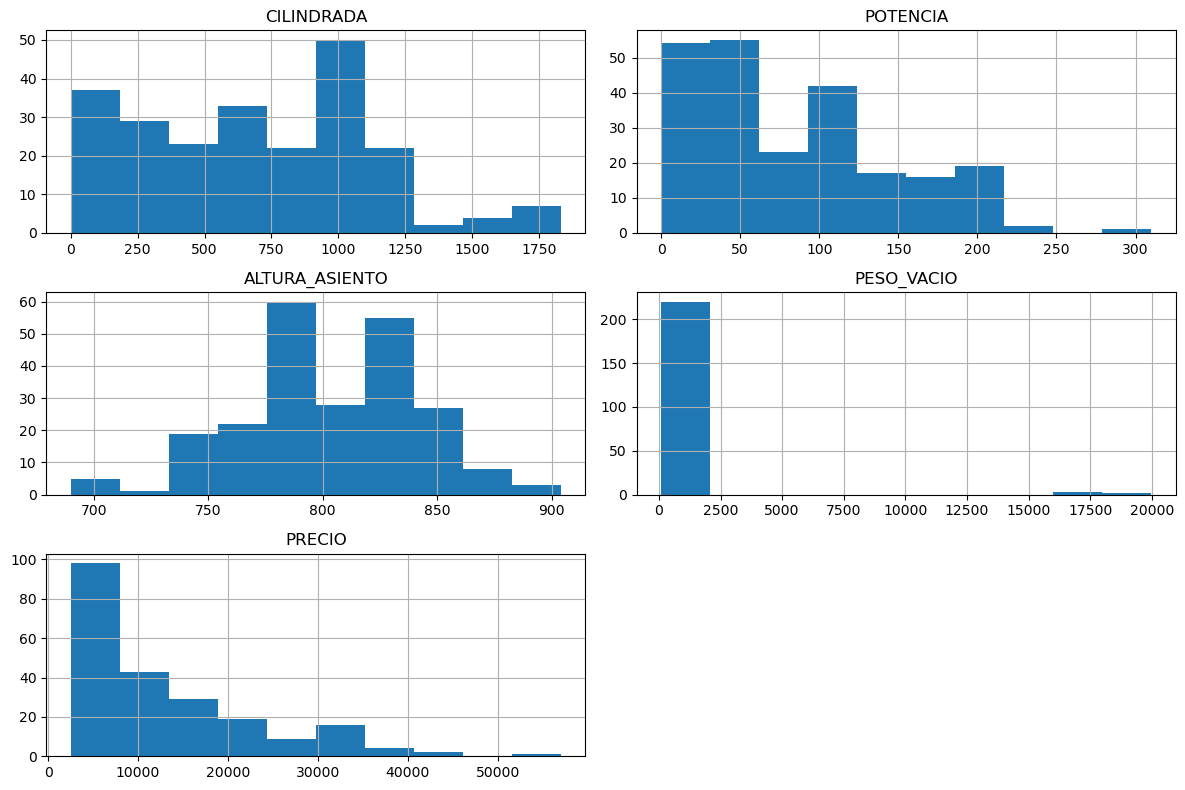

In [35]:
df[['CILINDRADA', 'POTENCIA', 'ALTURA_ASIENTO', 'PESO_VACIO', 'PRECIO']].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


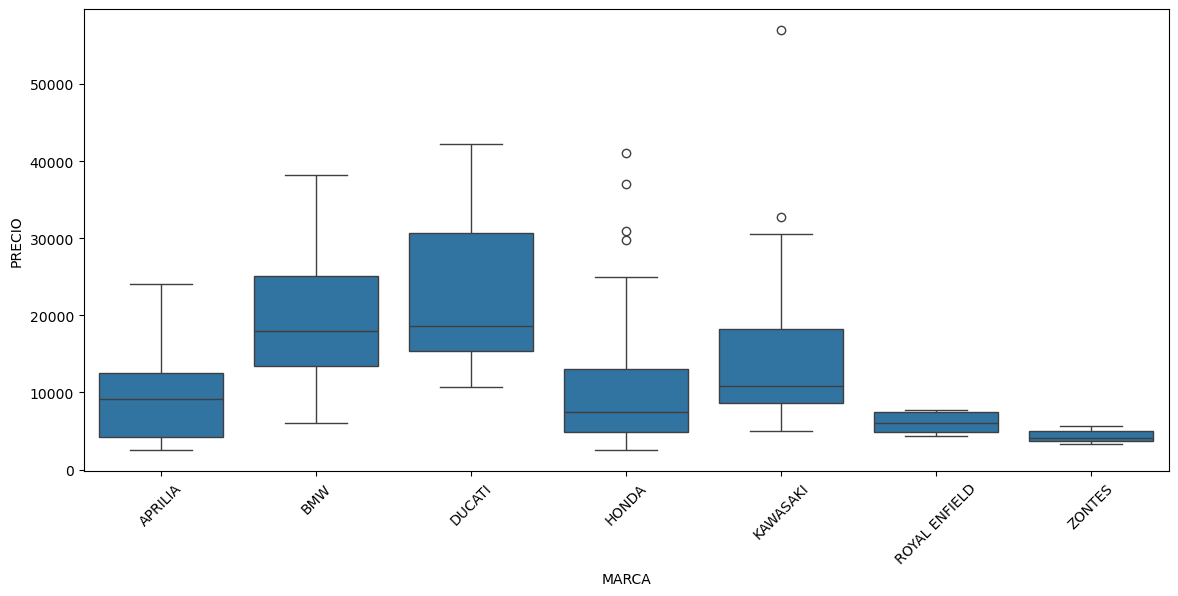

In [36]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='MARCA', y='PRECIO')
plt.xticks(rotation=45)
plt.show()


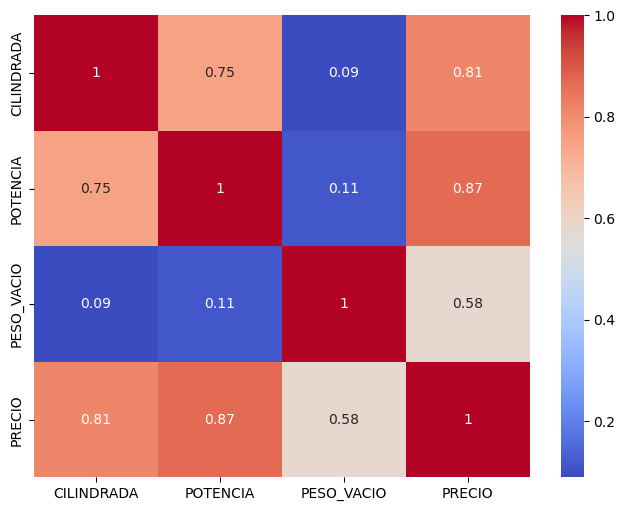

In [40]:
corr = df[['CILINDRADA', 'POTENCIA', 'PESO_VACIO', 'PRECIO']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


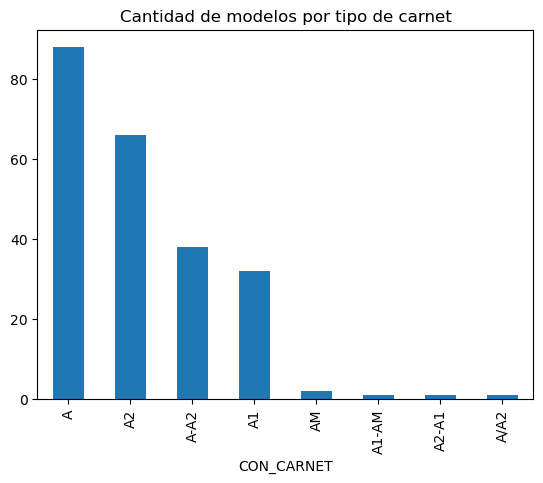

In [38]:
df['CON_CARNET'].value_counts().plot(kind='bar')
plt.title('Cantidad de modelos por tipo de carnet')
plt.show()


In [41]:
df.to_csv('dataset_motos_limpio.csv', index=False)


In [ ]:
# Necesitamos las dos columnas a comparar y revisar su composición
df_precio_carnet = df[['PRECIO', 'CON_CARNET']].dropna()


In [44]:
print(df_precio_carnet)

     PRECIO CON_CARNET
0    2599.0         AM
1    4199.0         A1
2    4199.0         A1
3    5499.0         A1
4    5399.0         A1
..      ...        ...
223  4987.0         A2
224  4987.0         A2
225  4987.0         A2
226  4987.0         A2
227  5592.0       A-A2

[221 rows x 2 columns]


Tenemos que considerar que para los carnet de conductor existe una jerarquía. AM < A1 < A2 < A, así tenemos que extraer el carnet "mínimo" para poder segmentar.

In [47]:
def extraer_carnet_minimo(valor):
    if pd.isna(valor):
        return np.nan
    
    carnets = valor.upper().split('-')
    
    orden_carnets = {'AM': 0, 'A1': 1, 'A2': 2, 'A': 3}
    
    # Filtramos solo los carnets válidos
    carnets_validos = [c for c in carnets if c in orden_carnets]
    
    if not carnets_validos:
        return np.nan
    
    # Tomamos el carnet de menor rango
    carnet_min = min(carnets_validos, key=lambda x: orden_carnets[x])
    
    return carnet_min



In [54]:
df_precio_carnet['CARNET_BASE'] = df_precio_carnet['CON_CARNET'].apply(extraer_carnet_minimo)
print(df_precio_carnet[['CARNET_BASE', 'CON_CARNET']].head(50))

   CARNET_BASE CON_CARNET
0           AM         AM
1           A1         A1
2           A1         A1
3           A1         A1
4           A1         A1
5           A1         A1
6           A1         A1
7           A1         A1
8           A1         A1
9           A2         A2
10           A          A
11          A2         A2
12           A          A
13           A          A
14           A          A
15           A          A
16           A          A
17           A          A
18           A          A
19           A          A
20          A2         A2
21          A2         A2
22          A2         A2
23          A2         A2
24          AM      A1-AM
25          A1      A2-A1
26          A2       A-A2
27          A2       A-A2
28          A2       A-A2
29          A2       A-A2
30           A          A
31           A          A
32          A2       A-A2
33          A2       A-A2
34           A          A
35           A          A
36           A          A
37          

In [ ]:
# tenemos valores nan porque algunos tienen separador /en vez de - los contaremos.
nan_carnet = df_precio_carnet['CARNET_BASE'].isna().sum()
print(nan_carnet)

1


 Genial, es solo 1 !!! Ahora debemos identificarlo para corregir eso.

In [57]:
indice_nan = df_precio_carnet['CARNET_BASE'].isna().idxmax()
df_precio_carnet.loc[indice_nan,'CARNET_BASE'] = 'A2'

In [59]:
print(df_precio_carnet.loc[indice_nan])

PRECIO         17930.0
CON_CARNET        A/A2
CARNET_BASE         A2
Name: 44, dtype: object


Veamos tres características fundamentales para quien empieza en las motos , precio para cada carnet, peso de las motos en relación a lo mismo,  

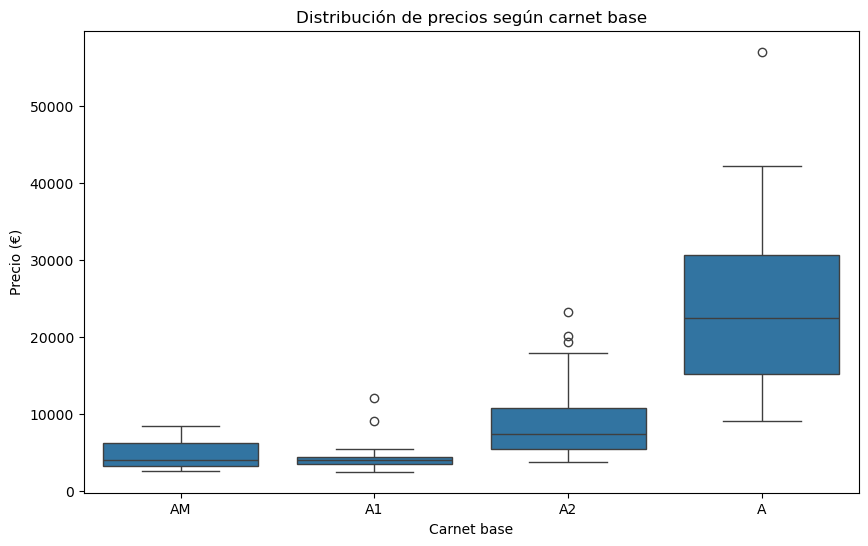

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_precio_carnet, x='CARNET_BASE', y='PRECIO', order=['AM', 'A1', 'A2', 'A'])
plt.title('Distribución de precios según carnet base')
plt.ylabel('Precio (€)')
plt.xlabel('Carnet base')
plt.show()


In [ ]:
# Crear una copia para no tocar los originales
df_peso_carnet = df.copy()

# Asignar la columna CARNET_BASE desde df_precio_carnet
df_peso_carnet['CARNET_BASE'] = df_precio_carnet['CARNET_BASE']


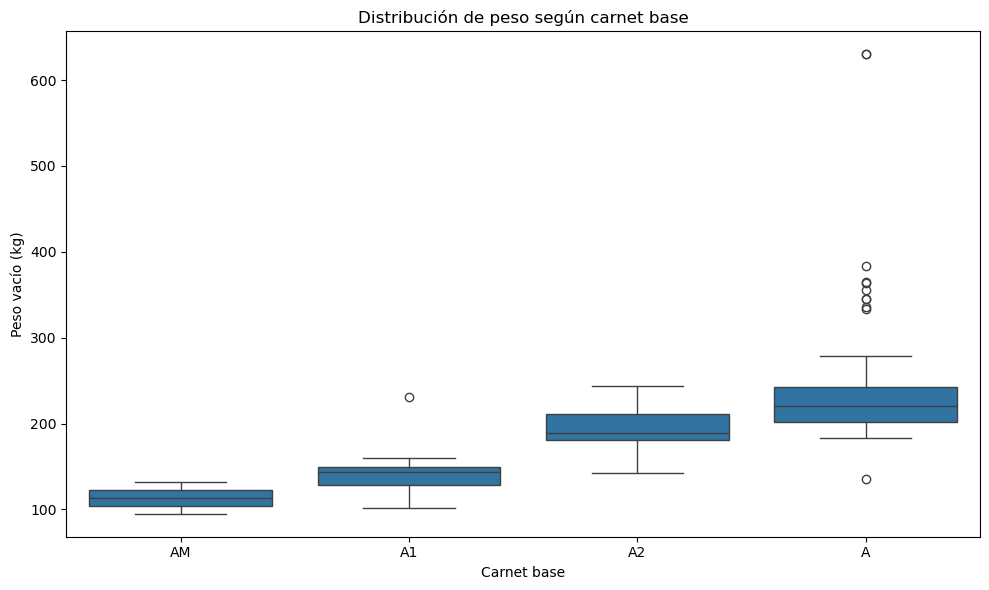

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_peso_carnet, x='CARNET_BASE', y='PESO_VACIO')
plt.title("Distribución de peso según carnet base")
plt.ylabel("Peso vacío (kg)")
plt.xlabel("Carnet base")
plt.tight_layout()
plt.show()


In [66]:
df['POTENCIA_EUR'] = df['POTENCIA'] / df['PRECIO']
df = df[(df['PRECIO'] > 0) & (df['POTENCIA'] > 0)]
df_top_ratio = df.sort_values(by='POTENCIA_EUR', ascending=False).head(10)


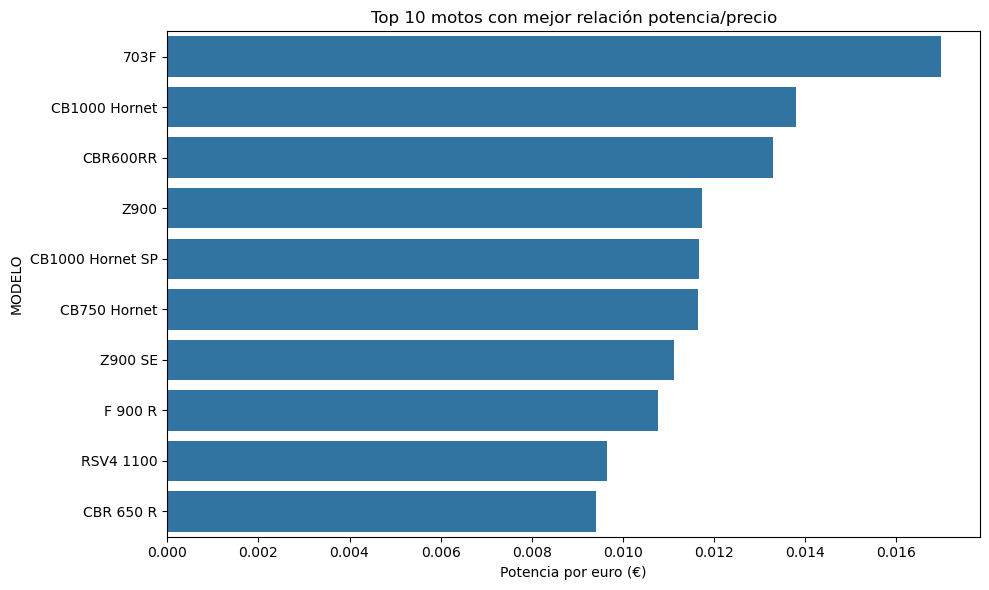

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_top_ratio, y='MODELO', x='POTENCIA_EUR')
plt.xlabel('Potencia por euro (€)')
plt.title('Top 10 motos con mejor relación potencia/precio')
plt.tight_layout()
plt.show()
